## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.9465 - acc: 0.3006 - val_loss: 1.7626 - val_acc: 0.3678
Epoch 2/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.7076 - acc: 0.3914 - val_loss: 1.6361 - val_acc: 0.4133
Epoch 3/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.6220 - acc: 0.4226 - val_loss: 1.5869 - val_acc: 0.4324
Epoch 4/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5584 - acc: 0.4450 - val_loss: 1.5916 - val_acc: 0.4344
Epoch 5/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.5104 - acc: 0.4624 - val_loss: 1.5455 - val_acc: 0.4444
Epoch 6/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.4745 - acc: 0.4722 - val_loss: 1.5158 - val_acc: 0.4551
Epoch 7/500
50000/50000 [==============================] - 8s 151us/

50000/50000 [==============================] - 7s 131us/step - loss: 0.2338 - acc: 0.9150 - val_loss: 3.4231 - val_acc: 0.4996
Epoch 116/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.2517 - acc: 0.9089 - val_loss: 3.4434 - val_acc: 0.4971
Epoch 117/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2353 - acc: 0.9154 - val_loss: 3.5158 - val_acc: 0.4917
Epoch 118/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2514 - acc: 0.9098 - val_loss: 3.4530 - val_acc: 0.4915
Epoch 119/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2400 - acc: 0.9138 - val_loss: 3.5153 - val_acc: 0.4849
Epoch 120/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.2363 - acc: 0.9159 - val_loss: 3.5411 - val_acc: 0.4905
Epoch 121/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2384 - acc: 0.9140 - val_loss: 3.5392 - val_acc: 0.4885
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.0710 - acc: 0.9753 - val_loss: 4.5949 - val_acc: 0.4921
Epoch 232/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0512 - acc: 0.9831 - val_loss: 4.6681 - val_acc: 0.4896
Epoch 233/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0627 - acc: 0.9786 - val_loss: 4.6947 - val_acc: 0.4847
Epoch 234/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1832 - acc: 0.9382 - val_loss: 4.7895 - val_acc: 0.4694
Epoch 235/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.2351 - acc: 0.9249 - val_loss: 4.8181 - val_acc: 0.4768
Epoch 236/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1156 - acc: 0.9592 - val_loss: 4.6155 - val_acc: 0.4947
Epoch 237/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1274 - acc: 0.9571 - val_loss: 4.7467 - val_acc: 0.4745
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 7s 139us/step - loss: 0.1199 - acc: 0.9602 - val_loss: 5.0373 - val_acc: 0.4872
Epoch 348/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0390 - acc: 0.9874 - val_loss: 5.0158 - val_acc: 0.4926
Epoch 349/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 5.0807 - val_acc: 0.4954
Epoch 350/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0992 - acc: 0.9666 - val_loss: 5.1670 - val_acc: 0.4888
Epoch 351/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.2031 - acc: 0.9375 - val_loss: 5.0683 - val_acc: 0.4835
Epoch 352/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1317 - acc: 0.9573 - val_loss: 5.0187 - val_acc: 0.4889
Epoch 353/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0509 - acc: 0.9837 - val_loss: 5.0694 - val_acc: 0.4918
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 7s 133us/step - loss: 0.0127 - acc: 0.9967 - val_loss: 5.3458 - val_acc: 0.4928
Epoch 464/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2551 - acc: 0.9334 - val_loss: 5.3563 - val_acc: 0.4784
Epoch 465/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1959 - acc: 0.9442 - val_loss: 5.1906 - val_acc: 0.4848
Epoch 466/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0678 - acc: 0.9784 - val_loss: 5.2361 - val_acc: 0.4879
Epoch 467/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 5.2739 - val_acc: 0.4912
Epoch 468/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0148 - acc: 0.9961 - val_loss: 5.2930 - val_acc: 0.4913
Epoch 469/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0049 - acc: 0.9995 - val_loss: 5.2709 - val_acc: 0.4954
Epoch 470/500
50000/50000 [

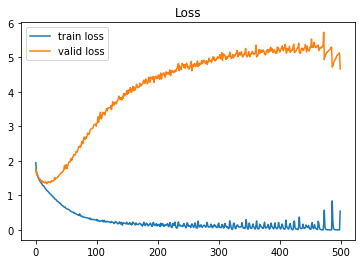

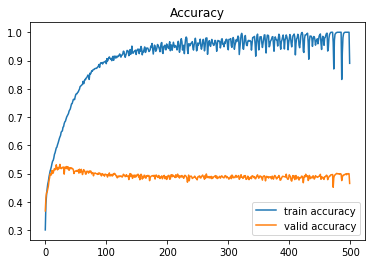

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()